# Data Preanalysis for Clustering

This tutorial show how to analyse trajectory data. The aim in this tutorial is, to find repeatingly occuring behaviour in the trajectory. This prototypical behaviour can be obtained by clustering the trajectory data. This idea is inspired by Braun et al.'s paper "Identifying Prototypical Components in Behaviour Using Clustering Algorithms"
If you wish to have more details about the idea, please refer to this paper.


As we use the k-mean algorithm to cluster the the data. This algorithm need can not decide in how many clusters the data should be clustered. Therefore we need to find out the number of clusters k before we can cluster the data.
Since the trajectory data we are dealing with is usually noisy and to make it easier for the clusterer, we prepare the data first to obtain optimal results.

## Steps to be performed
The following steps are performed to obtain the different prototypical behaviours
1. Preprocessing
   * Smoothening of the data, to reduce noise
   * calculate the velocities of data the pure location/rotational data
   * perform pca, to find relevant dimensions
   we treat locational and rotational information seperated here and therefore perform two pcas
   * Rescale the data, so that it is normalized between the values of 0 and 1.
2. Find optimal number of clusters k
   * Calculate the cost for each number of clusters
   * Check, how the costs change when adding another cluster (difference of costs)
   * Use the previous steps to reduce the possible range of clusters
   * within the new cluster range, calculate cluster instability
   * within the new cluster range, calculate cluster quality
   * use all information calculated above to make a decision on k
       

Since the trajectory module of the navipy toolbox, already provides many of the necessary feature,
we first load the data into a trajectory object. Notice that here the data was provided as a csv file.

In [4]:
from navipy.trajectories import Trajectory

mytraj = Trajectory()
filename = "/media/luiza/Daten/Repos/tmpnavibox/toolbox-navigation/navipy/resources/sample_experiment/vanHateren1999/h08.csv"
mytraj.read_csv(filename, sep=',', header=[0, 1], index_col=0)

location                              zyx                    
              x          y          z    alpha_0   alpha_1   alpha_2
0    -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
1    -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
2    -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
3    -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
4    -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
5    -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
6    -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
7    -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
8    -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
9    -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
10   -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
11   -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
12   -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
13   -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
14   -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
15   -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
16   -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
17   -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
18   -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
19   -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
20   -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
21   -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
22   -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
23   -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
24   -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
25   -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
26   -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
27   -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
28   -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
29   -145.30000  140.22000  142.18000   0.149904  0.171600  0.893800
...         ...        ...        ...        ...       ...       ...
3937 -109.72666  126.85332   91.32992  15.524137  0.682600 -0.206867
3938 -109.78084  126.94168   91.86008  15.523904  0.684950 -0.206346
3939 -109.84253  127.02004   92.39775  15.524679  0.687926 -0.206200
3940 -109.90880  127.09840   92.93040  15.525888  0.690756 -0.206788
3941 -109.98676  127.16676   93.47056  15.524935  0.691449 -0.204713
3942 -110.07512  127.24512   94.00072  15.522763  0.690862 -0.201246
3943 -110.16935  127.31761   94.52501  15.521410  0.691235 -0.199465
3944 -110.26184  127.38388   95.03308  15.519867  0.692478 -0.198941
3945 -110.35015  127.44010   95.53110  15.518201  0.693904 -0.198197
3946 -110.42642  127.48428   96.01708  15.517346  0.695386 -0.196772
3947 -110.49269  127.52423   96.48883  15.518669  0.695758 -0.196100
3948 -110.55896  127.55632   96.95272  15.521262  0.695763 -0.196100
3949 -110.60682  127.57841   97.38979  15.523913  0.696436 -0.196284
3950 -110.64050  127.58000   97.79850  15.526364  0.697125 -0.197455
3951 -110.66259  127.57482   98.17403  15.529063  0.698837 -0.200263
3952 -110.67000  127.54064   98.53488  15.530304  0.702142 -0.202581
3953 -110.66000  127.48969   98.87155  15.530168  0.705983 -0.203065
3954 -110.64114  127.41456   99.18404  15.528806  0.708597 -0.201791
3955 -110.60715  127.31525   99.46045  15.526042  0.710395 -0.198310
3956 -110.53784  127.19176   99.69736  15.521744  0.713408 -0.193670
3957 -110.44435  127.03409   99.87591  15.514703  0.718739 -0.187658
3958 -110.31668  126.84502  100.00610  15.504205  0.726588 -0.179929
3959 -110.15552  126.61759  100.07862  15.489794  0.736096 -0.170610
3960 -109.95600  126.35180  100.09720  15.471246  0.746544 -0.158234
3961 -109.70463  126.03416  100.04255  15.448155  0.755622 -0.141499
3962 

Now the next steps are the preprocessing. This can be don with the preprocessing module of the navipy toolbox
%TODO how do I now how many components too take from pca?
The function returns a table that contains the processed data.

/home/luiza/anaconda3/lib/python3.5/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


            dx        dy        dz  dalpha_0  dalpha_1  dalpha_2
0    -0.028002 -0.021033  0.021113 -0.346592  0.179329 -0.411220
1    -0.028002 -0.021033  0.021113 -0.346592  0.179329 -0.411220
2    -0.028002 -0.021033  0.021113 -0.346592  0.179329 -0.411220
3    -0.028002 -0.021033  0.021113 -0.346592  0.179329 -0.411220
4    -0.028002 -0.021033  0.021113 -0.346592  0.179329 -0.411220
5    -0.028002 -0.021033  0.021113 -0.346592  0.179329 -0.411220
6    -0.028002 -0.021033  0.021113 -0.346592  0.179329 -0.411220
7    -0.028002 -0.021033  0.021113 -0.346592  0.179329 -0.411220
8    -0.028002 -0.021033  0.021113 -0.346592  0.179329 -0.411220
9    -0.028002 -0.021033  0.021113 -0.346592  0.179329 -0.411220
10   -0.028002 -0.021033  0.021113 -0.346592  0.179329 -0.411220
11   -0.028002 -0.021033  0.021113 -0.346592  0.179329 -0.411220
12   -0.028002 -0.021033  0.021113 -0.346592  0.179329 -0.411220
13   -0.028002 -0.021033  0.021113 -0.346592  0.179329 -0.411220
14   -0.028002 -0.021033 

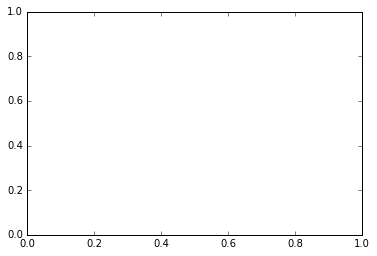

In [5]:
from navipy.preanalysis.preprocessing import preprocessing

X_std = preprocessing(mytraj)
print(X_std)

Note that this function lets you choose on which columns of the trajectory a pca should be applied and to how many components it should be reduced. In default, the locational (x,y,z) and the rotational (alpha, beta, gamma) information are treated independent and no data dimension is performed but only a pca is performed for three components.

Next we want to find out in how many clusters would be optimal for our data.
It is the easiest to do this graphically, by plotting to get a feeling for the data.
So first we plot two dimensions of the data, to get an idea of how they are related.
Then we perform hierarchical clustering and increase the number of clusters iteratively to plot them
agains the costs for the corresponding number of clusters.

In this example we use some artificial data with only two dimensions for better understanding
First lets plot the data
Note data our Data has only two dimensions, as a Trajectory contains 6 dimensions by default, we will end up with 4 dimensions containing nans. That is why we use only the first two columns of the trajectory as the Data.

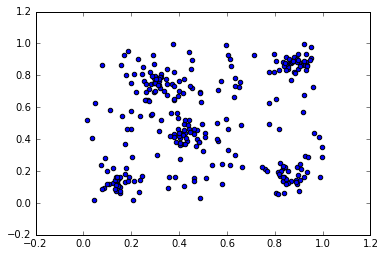

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


mytrajart = Trajectory()
fname = '/media/luiza/Daten/Repos/tmpnavibox/pbcClustering/Data/artData2.csv'
mytrajart.read_csv(fname, sep=',', header=[0, 1], index_col=0)
Data=np.array(mytrajart.values[:,0:2])

plt.scatter(Data[:, 0], Data[:, 1])
plt.show()

This plot already gives us an idea of how many clusters we need. As there are 5 distinguishable blobs.
However, this is not always the case, so we will proceed analysis this data.
Next we will to hierarchical clustering with a multiple number of clusters and plot the costs per cluster number

In [5]:
from navipy.preanalysis.preprocessing import get_joining_cost
import scipy.cluster.hierarchy as hac


z = hac.linkage(Data, method='ward')

plt.subplot(121)
dn = hac.dendrogram(z)

plt.subplot(122)
#plt.plot(range(1, len(z)+1), z[::-1, 2])
costs, max_nCluster = get_joining_cost(np.array(Data),300)#mytrajart.values[:,0:2]

plt.scatter(range(min(300,max_nCluster)),costs)
plt.show()

z shp (279, 4)
(279,)


this figure is difficult to read, so lets plot only the first 30 clusters

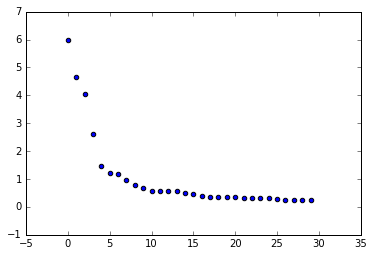

In [6]:
plt.scatter(range(30),costs[0:30])
plt.show()

Here we see that the costs start to decrease slower with 5 clusters. So lets plott the difference of the costs to see, where the costs change only minorly. We do this for the first 20 clusters, as the costs increase again when having more than 20. Here we use the ward joining cost, which describes the costs of joining two clusters, which is calculated with with the clusters variance.

\begin{equation*}
Var_{p+q}=VAR_p+VAR_q+n_pn_q\frac{(x_p-x_q)^2}{n_p+n_q}
\end{equation*}

where VAR_i is the variance of the i-th cluster n_i is the size of that cluster and x_i is the average point of the cluster.

In [7]:
knee = np.abs(np.diff(costs)[0:20])
plt.plot(range(20), knee)

plt.show()

Here we see, that if we use less than 5 clusters, the costs increase significantly. Also we can see that we have a minimum in the change of costs for 5 clusters. When increasing to 6 clusters the costs increase again.

With 10 clusters, we have again a very small change of costs, but as we want the smallest amount of clusters with a small change in costs, we should prefer 5 here. Also its keeps everything more simple.

Luckily for us, does the preanalysis module provide a plotting function that includes all of this already

z shp (279, 4)
(279,)


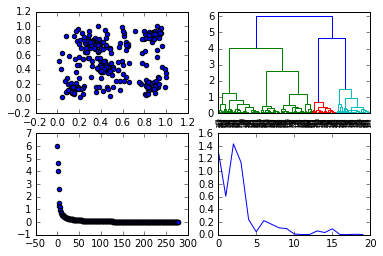

In [8]:
from navipy.preanalysis import plotting as anplt


anplt.plot_Data_costs(Data)

So know we have a hint to go with 5 clusters already. 
To cluster the data the k-mean algorithm is used in the preanalysis module. 
But to be sure we will check for other measurements, as the cluster instability and the cluster quality. 
Luckily the plotting part of the preanalysis module also provides a function for this. 

In [9]:
anplt.plot_instab_qualities(Data)

In the most upper subplot, the instability values are displayed. The middle one shows the cluster quality, and the lowest the average quality over several k-mean trials with different starting conditions.
We have three lines, because we used 3 different datasets. The blue one is the whole data, for the green line randomly 90% of the data was chosen and for the red line 80%.

In the figure for the instability we can see, that the instability starts to increase with 5 clusters for the 90% dataset.
For the quality, the first maximmum for the complete and 90% data is also at 5 clusters. And for the mean quality only the whole dataset's quality has its maximum at 5 clusters. In the other cases, the maxima are at 4 clusters.

So as our final conclusion we can say, that 5 clusters would be the optimum on this data.

Of course it is also possible to individually get the different measures for the data. The preanalysis package provides the cluster quality, a mean cluster quality for multiply runs of the k-mean with different starting points and the instability measure.
The quality of a cluster c_i is simply the squared minimum distance from its centroid to the other clusters' centers divided by the variance of the cluster.

\begin{equation*}
q_c = \frac{min_{c!=g} (d_{cg}^2)}{VAR_{c}}
\end{equation*}

The instability measure is the mean average distance between all clusters. For that multiple k-mean runs are performed with different starting points and the set of cluster centers that has the smallest distance to all other sets of cluster centers is computed. This set is going to be the mean set of clusters centers. Then the average distance from this mean set is calculated to all the centroids of the other run. The resulting quantity is our instability measure.

So if one wishes to get the quality measure the quality function of the preanalysis modul.
It allows the user to choose how much of the data should be used and the range of clusters to be considered. Here we use 90% of the data and choose a range from 2 to 15

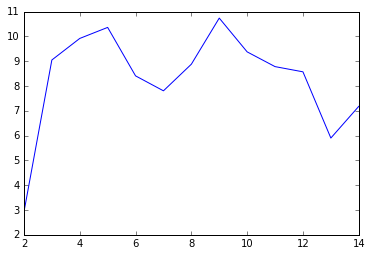

In [9]:
from navipy.preanalysis.preprocessing import quality


qual = quality(Data, pro=1, max_nCluster=15, min_nCluster=2)

plt.plot(range(2,15),qual)

The same can be done for the mean quality. Here an example with 10 runs for each number of clusters.

In [10]:
from navipy.preanalysis.preprocessing import meanQuality


meanqual = meanQuality(Data, pro=1, max_nCluster=15, min_nCluster=2, numsets=10)

plt.plot(range(2,15),meanqual)